
# Project: tmdb-movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, I will analysis the data associated with number of different movies over the years.

### Question(s) for Analysis
I will try to find the common properties between high revenue movies and what is the difference between them and low revenue movies!

## import statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties


#### Loading the data:

In [2]:
df = pd.read_csv("tmdb-movies.csv")

#### Discover the dimensions of the dataset:

In [3]:
df.shape

(10866, 21)

* It's so big dataset enough to train strong models

#### Discover the first rows in the dataset:

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


* **production company, genres and cast columns** contain multiple values separated by pipe so we need to separate this values into different rows.

#### Discover the data types of the dataset columns:


In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Find statistics information about the dataset:

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### plotting histogram for each variable in the data set:

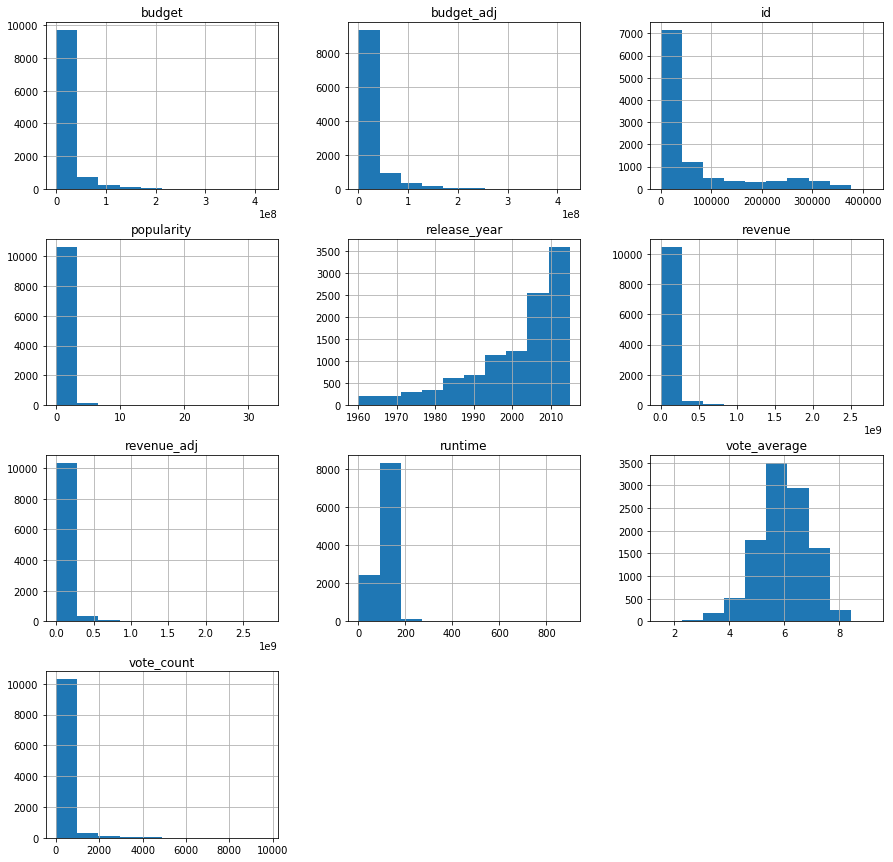

In [7]:
df.hist(figsize=(15,15));

#### Check for duplicated rows:

In [8]:
df.duplicated().sum()

1

* so we need to remove this duplicate

#### Check for missing values:

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* we need to remove those missing values to remain the accuracy of our analysis and any future training models, but in some columns we couldn't remove the whole rows which contain nulls in order not underestimate our dataset.


### Data Cleaning


#### We will drop the redundant rows here:

In [10]:
df.drop_duplicates(inplace =True)

#### Check for duplicates:

In [11]:
df.duplicated().sum()

0

>**Homepage, tagline and keywords columns** have many missing values and if we drop all these rows we will lose a big part of our dataset so we will drop this column as we don't need it to answer our questions.

#### Dropping these columns:

In [12]:
df.drop(["homepage","tagline","keywords"],axis=1,inplace=True)

#### Check for dropped columns existance:

In [13]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

#### Drop all rows which have missing values:

In [14]:
df.dropna(inplace=True)


#### Check for missing values:

In [15]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [16]:
df.shape

(9770, 18)

#### After drop missing values we should get back the default indexes:

In [17]:
df.reset_index(drop=True,inplace=True)

#### Separate multiple values in production_companies, genres and cast columns:

In [18]:
#get five copies of the dataset to separate multi values in it
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()


In [19]:
#separate original dataset into two datasets but with single values in those columns
split_columns = ["production_companies","cast","genres"]
for col in split_columns:
    df1[col] = df1[col].apply(lambda x:x.split("|",maxsplit=4)[0] if x.count("|") >= 1 else x)
    df2[col] = df2[col].apply(lambda x:x.split("|",maxsplit=4)[1] if x.count("|") >= 1 else None)
    df3[col] = df3[col].apply(lambda x:x.split("|",maxsplit=4)[2] if x.count("|") >= 2 else None)
    df4[col] = df4[col].apply(lambda x:x.split("|",maxsplit=4)[3] if x.count("|") >= 3 else None)
    df5[col] = df5[col].apply(lambda x:x.split("|",maxsplit=4)[4] if x.count("|") >= 4 else None)

#### Check for the separation in the five dataset:

In [20]:
df1

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western,Regency Enterprises,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction,Paramount Pictures,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama,Twentieth Century Fox Film Corporation,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family,Universal Pictures,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy,Walt Disney Pictures,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [21]:
df2

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Adventure,Amblin Entertainment,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Charlize Theron,George Miller,An apocalyptic story set in the furthest reach...,120,Adventure,Kennedy Miller Productions,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Theo James,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Science Fiction,Mandeville Films,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Mark Hamill,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Adventure,Truenorth Productions,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Paul Walker,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Crime,Original Film,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Tom Hardy,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Drama,Appian Way,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Jason Clarke,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Action,Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Jessica Chastain,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Adventure,Scott Free Productions,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Jon Hamm,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Animation,Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Phyllis Smith,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Animation,Pixar Animation Studios,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [22]:
df3

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Legendary Pictures,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Hugh Keays-Byrne,George Miller,An apocalyptic story set in the furthest reach...,120,Science Fiction,None,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Kate Winslet,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Thriller,Red Wagon Entertainment,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Carrie Fisher,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Science Fiction,Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Jason Statham,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Thriller,Media Rights Capital,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Will Poulter,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Adventure,CatchPlay,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Emilia Clarke,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Thriller,None,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Kristen Wiig,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Science Fiction,Mid Atlantic Films,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Michael Keaton,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Adventure,None,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Richard Kind,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Family,Walt Disney Studios Motion Pictures,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [24]:
df4

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Thriller,Fuji Television Network,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Nicholas Hoult,George Miller,An apocalyptic story set in the furthest reach...,120,Thriller,None,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Ansel Elgort,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,None,NeoReel,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Adam Driver,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Fantasy,None,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Michelle Rodriguez,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,None,Dentsu,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Domhnall Gleeson,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Thriller,Anonymous Content,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Jai Courtney,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Adventure,None,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Jeff Daniels,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,None,International Traders,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Allison Janney,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Comedy,None,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Bill Hader,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,None,None,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [25]:
df5

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,None,Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Josh Helman,George Miller,An apocalyptic story set in the furthest reach...,120,None,None,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Miles Teller,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,None,None,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Daisy Ridley,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,None,None,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Dwayne Johnson,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,None,One Race Films,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Paul Anderson,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,None,New Regency Pictures,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,J.K. Simmons,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,None,None,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Michael PeÃ±a,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,None,TSG Entertainment,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Steve Coogan,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,None,None,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Lewis Black,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,None,None,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


#### merge all of these rows into one:

In [21]:
df =df1.append(df2.append(df3.append(df4.append(df5,ignore_index = True),ignore_index = True),ignore_index = True),ignore_index = True)

#### Check for missing data:

In [22]:
df.isnull().sum()

id                          0
imdb_id                     0
popularity                  0
budget                      0
revenue                     0
original_title              0
cast                      840
director                    0
overview                    0
runtime                     0
genres                  24207
production_companies    25709
release_date                0
vote_count                  0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
dtype: int64

#### Drop missing data:

In [23]:
df.dropna(inplace=True)

#### Check again:

In [24]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Check for duplicates:

In [25]:
df.duplicated().sum()

0

#### Get the indexes to the default again:

In [26]:
df.reset_index(drop=True,inplace=True)

### Investigation the three columns in the new data set:

In [27]:
df.shape

(17310, 18)

In [28]:
df.genres.value_counts()

Drama              3463
Comedy             2772
Action             1943
Thriller           1629
Horror             1220
Adventure          1024
Crime               885
Romance             832
Science Fiction     599
Fantasy             535
Family              468
Animation           460
Mystery             452
Documentary         281
Music               199
History             198
War                 158
Western              83
TV Movie             73
Foreign              36
Name: genres, dtype: int64

In [59]:
df.cast.value_counts()

Robert De Niro           57
Nicolas Cage             54
Bruce Willis             50
Clint Eastwood           42
Johnny Depp              41
Robin Williams           40
John Travolta            40
Samuel L. Jackson        40
Harrison Ford            39
Tom Hanks                39
Sylvester Stallone       38
John Cusack              38
Jean-Claude Van Damme    35
Morgan Freeman           35
Meryl Streep             34
Al Pacino                33
Denzel Washington        33
Eddie Murphy             33
Liam Neeson              33
Mel Gibson               32
Steve Martin             32
Nicole Kidman            32
Richard Gere             32
Tom Cruise               32
Sean Connery             31
Kevin Costner            31
Gene Hackman             31
Michael Caine            31
Adam Sandler             30
Matt Damon               30
                         ..
Uta Hagen                 1
Jimmy Somerville          1
Jake Abel                 1
Kou Shibasaki             1
Matthew Marsden     

In [35]:
df.production_companies.value_counts()

Universal Pictures                        508
Paramount Pictures                        430
Warner Bros.                              392
Twentieth Century Fox Film Corporation    277
Columbia Pictures                         272
New Line Cinema                           219
Walt Disney Pictures                      213
Metro-Goldwyn-Mayer (MGM)                 176
Columbia Pictures Corporation             152
Touchstone Pictures                       146
TriStar Pictures                          144
Miramax Films                             137
20th Century Fox                           88
DreamWorks SKG                             86
Village Roadshow Pictures                  86
BBC Films                                  83
Regency Enterprises                        82
United Artists                             76
Orion Pictures                             72
Fox Searchlight Pictures                   68
Dimension Films                            67
Amblin Entertainment              

In [66]:
df.runtime.value_counts()

90     763
95     550
100    541
93     510
97     500
94     474
96     471
91     454
105    439
98     427
92     424
102    414
88     410
101    409
99     378
108    377
104    364
89     358
103    353
106    352
107    349
110    341
85     330
87     314
86     272
109    263
112    257
113    247
115    244
111    229
      ... 
199      2
54       2
229      2
292      2
213      2
372      2
219      1
31       1
19       1
877      1
51       1
36       1
29       1
300      1
236      1
28       1
235      1
336      1
470      1
500      1
17       1
42       1
49       1
242      1
216      1
705      1
40       1
24       1
566      1
233      1
Name: runtime, Length: 223, dtype: int64

#### Remove unwanted columns from our data:

In [29]:
df.drop(["id","imdb_id","overview","budget","budget_adj",], axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


In [30]:
# make a mask for our dependent variable
high_revenue = df.revenue > df.revenue.mean()
low_revenue = df.revenue < df.revenue.mean()

### There was a relation between high revenue movie and its vote average?

#### find the mean of vote_average according to high revenue :

In [31]:
df.vote_average[high_revenue].mean()

6.2936499872999745

#### find the mean of vote_average according to high revenue :

In [32]:
df.vote_average[low_revenue].mean()

5.8762581320571297

>* So high vote average movies have higher revenue

#### plot a multi histogram for the vote_average of high and low revenue movies:

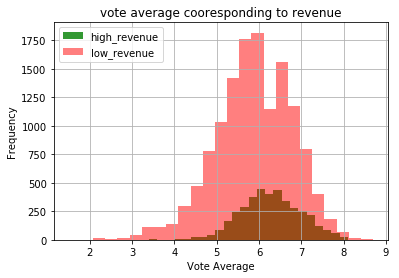

In [36]:
df.vote_average[high_revenue].hist(alpha =0.8,color="green",bins=25,label='high_revenue');
df.vote_average[low_revenue].hist(alpha =0.5,color="red",bins=25,label='low_revenue');
plt.xlabel("Vote Average");
plt.ylabel("Frequency");
plt.title('vote average cooresponding to revenue');
plt.legend();

> * There is no high colleration between the vote average and high revenue which tell us that maybe most of the votes are fake which makes the movies over rated, but in general high revenue movies have higher vote average than low revenew movies

#### Test if vote average is critic or audience:

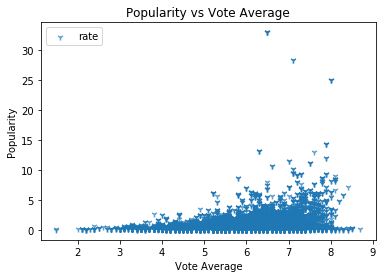

In [35]:
plt.scatter(data=df, x = 'vote_average', y = 'popularity',alpha=0.7, marker='1',
            label="rate");
plt.xlabel("Vote Average");
plt.ylabel("Popularity");
plt.title("Popularity vs Vote Average");
plt.legend(loc='upper left');
plt.show();


> * Most of the vote average is critic rating not audience rating

### There was a relation between high revenue movie and its duration?

#### find the mean of vote_average according to high revenue :

In [34]:
df.runtime[high_revenue].mean()

114.12623825247651

#### find the mean of vote_average according to high revenue :

In [35]:
df.runtime[low_revenue].mean()

101.60966125775816

>* So small duration movies have lower revenue

#### plot a multi histogram for the duration of high and low revenue movies:

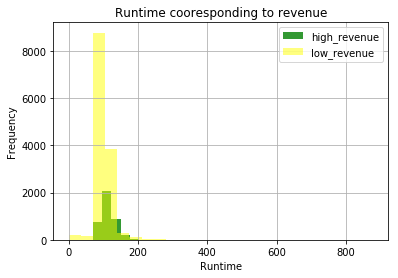

In [37]:
df.runtime[high_revenue].hist(alpha =0.8,color="green",bins=25,label='high_revenue');
df.runtime[low_revenue].hist(alpha =0.5,color="yellow",bins=25,label='low_revenue');
plt.title("Runtime cooresponding to revenue");
plt.xlabel("Runtime");
plt.ylabel("Frequency");
plt.legend();

> * Most of the low revenue movies have a smaller duration than high revenue movies

### There was a relation between high revenue movie and its genre?


#### find the mode of genres according to high revenue :

In [37]:
df.genres[high_revenue].mode()[0]

'Drama'

#### find the mode of genres according to low revenue :

In [43]:
df.genres[low_revenue].mode()[0]

'Drama'

#### plot a bar chart for the average revenues corresponding to each genre:

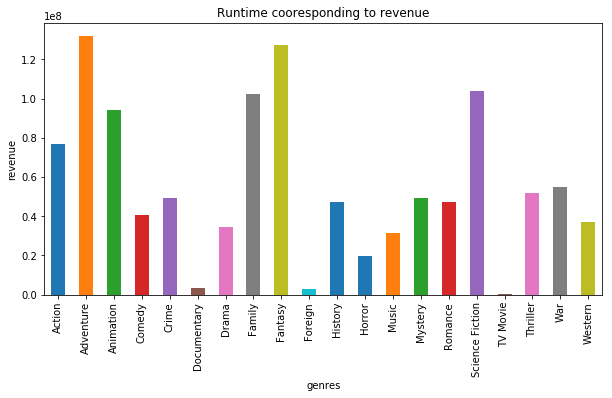

In [38]:
df.groupby('genres').revenue.mean().plot(kind='bar',figsize=(10,5));
plt.title("Runtime cooresponding to revenue");
plt.ylabel("revenue");


>* fantasy, adventure ,science fiction and family movies have the highest revenues
>* Documentary, Foreign and TV movies have the lowest revenues

## Conclusions


* There is no high colleration between the vote average and high revenue which tell us that maybe most of the votes are fake which makes the movies over rated, but in general high revenue movies have higher vote average than low revenew movies

* additional reasearch can be done to specify the audience vote from critic vote

* Most of the low revenue movies have a smaller duration than high revenue movies

* fantasy, adventure ,science fiction and family movies have the highest revenues

* Documentary, Foreign and TV movies have the lowest revenues

### Limitations

* I prefered to delete rows instead of filling it with regression